Here I am using in built PCA from sklearn, althouh I can implement it from scratch using numpy, by finding covariance matrix, eigen values and vectors, and then projecting the data onto the new basis. But sklearn is much faster and easier to use.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import gzip

Firstly I am loading the data

In [9]:
class_lab = pd.read_csv("../data/class.tsv", header=None, names=["Class"])["Class"]
columns_df = pd.read_csv("../data/columns.tsv.gz", sep="\t", comment="#")
gene_ids = columns_df.set_index("GeneSymbol").loc[["XBP1", "GATA3"]]["ID"].astype(str).tolist()

Load filtered gene expression data

In [10]:
with gzip.open("../data/filtered.tsv.gz", "rt") as f:
    exp_df = pd.read_csv(f, sep="\t")

exp_df.columns = exp_df.columns.str.strip()


Then extract expression levels for XBP1 and GATA3 is done

In [11]:
sel_exp = exp_df[gene_ids].copy()
sel_exp.columns = ["XBP1", "GATA3"]


Now I am going to perform PCA on the filtered gene expression data

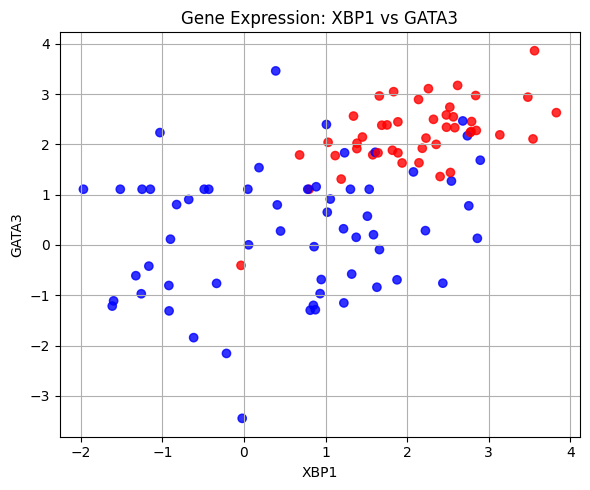

In [12]:
plt.figure(figsize=(6, 5))
colors = class_lab.map({1: "red", 0: "blue"})
plt.scatter(sel_exp["XBP1"], sel_exp["GATA3"], c=colors, alpha=0.8)
plt.xlabel("XBP1")
plt.ylabel("GATA3")
plt.title("Gene Expression: XBP1 vs GATA3")
plt.grid(True)
plt.tight_layout()
plt.show()


PCA projection onto PC1

In [13]:
pca = PCA(n_components=1)
pc1 = pca.fit_transform(sel_exp)


1D projection plot

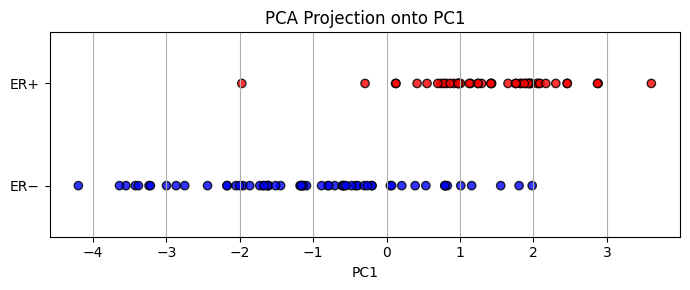

In [14]:
# 0 or 1 for plotting on two rows
y_offsets = class_lab.values 

plt.figure(figsize=(7, 3)) 
plt.scatter(pc1, y_offsets, c=colors, alpha=0.8, edgecolor='k')
plt.yticks([0, 1], ["ER−", "ER+"])
plt.ylim(-0.5, 1.5) 
plt.xlabel("PC1")
plt.title("PCA Projection onto PC1")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()